#This submission belongs to Abhigyan 1CR19CS004
Question: Build the Linear regression and Logistic regression model on the dataset. Tune the
parameters. Visualize the results. Measure the model performance using confusion matrix
and ROC curve. Conclude with the summary of your findings.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [75]:
from csv import writer
from csv import reader
with open('br35h_Brain_Tumour.csv', 'r') as read_obj, \
        open('dataset.csv', 'w', newline='') as write_obj:
    csv_reader = reader(read_obj)
    csv_writer = writer(write_obj)
    for row in csv_reader:
        csv_writer.writerow(row)

In [76]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(555, 32)


,case_no,diagnosis,curvature_mean,comp_Mean,concavity_Mean,concave points_Mean,symmetry_Mean,fractal_dimension_Mean,radius_se,texture_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_Mean,perimeter_Mean,texture_Mean,area_Mean
0,1,P,0.11310,0.2293,0.21280,0.08025,0.2069,0.07682,0.2121,1.169,...,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310,13.73,93.60,22.61,578.3
1,2,P,0.11390,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.033,...,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,14.54,96.73,27.54,658.8
2,3,P,0.09867,0.0720,0.07395,0.05259,0.1586,0.05922,0.4727,1.240,...,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216,14.68,94.74,20.13,684.5
3,4,P,0.11700,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,...,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,16.13,108.10,20.68,798.8
4,5,P,0.09831,0.1027,0.14790,0.09498,0.1582,0.05395,0.7582,1.017,...,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,19.81,130.00,22.15,1260.0


In [77]:
data.tail()

,case_no,diagnosis,curvature_mean,comp_Mean,concavity_Mean,concave points_Mean,symmetry_Mean,fractal_dimension_Mean,radius_se,texture_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_Mean,perimeter_Mean,texture_Mean,area_Mean
550,551,P,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,21.56,142.00,22.39,1479.0
551,552,P,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,20.13,131.20,28.25,1261.0
552,553,P,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,16.60,108.30,28.08,858.1
553,554,P,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,20.60,140.10,29.33,1265.0
554,555,N,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,...,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,7.76,47.92,24.54,181.0


In [78]:
#meta-data about DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case_no                  555 non-null    int64  
 1   diagnosis                555 non-null    object 
 2   curvature_mean           555 non-null    float64
 3   comp_Mean                555 non-null    float64
 4   concavity_Mean           555 non-null    float64
 5   concave points_Mean      555 non-null    float64
 6   symmetry_Mean            555 non-null    float64
 7   fractal_dimension_Mean   555 non-null    float64
 8   radius_se                555 non-null    float64
 9   texture_se               555 non-null    float64
 10  periPeter_se             555 non-null    float64
 11  area_se                  555 non-null    float64
 12  smoothness_se            555 non-null    float64
 13  compactness_se           555 non-null    float64
 14  concavity_se             5

In [79]:
data.isnull().sum() # knowing how many missing values in the data

case_no                    0
diagnosis                  0
curvature_mean             0
comp_Mean                  0
concavity_Mean             0
concave points_Mean        0
symmetry_Mean              0
fractal_dimension_Mean     0
radius_se                  0
texture_se                 0
periPeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
syPPetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
radius_Mean                0
perimeter_Mean             0
texture_Mean               0
area_Mean                  0
dtype: int64

In [80]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 0 if x=='P' else 1) #Converting all M's to 0 and rest to 1 
data.head()

,case_no,diagnosis,curvature_mean,comp_Mean,concavity_Mean,concave points_Mean,symmetry_Mean,fractal_dimension_Mean,radius_se,texture_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_Mean,perimeter_Mean,texture_Mean,area_Mean
0,1,0,0.11310,0.2293,0.21280,0.08025,0.2069,0.07682,0.2121,1.169,...,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310,13.73,93.60,22.61,578.3
1,2,0,0.11390,0.1595,0.16390,0.07364,0.2303,0.07077,0.3700,1.033,...,0.1678,0.6577,0.7026,0.1712,0.4218,0.13410,14.54,96.73,27.54,658.8
2,3,0,0.09867,0.0720,0.07395,0.05259,0.1586,0.05922,0.4727,1.240,...,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216,14.68,94.74,20.13,684.5
3,4,0,0.11700,0.2022,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,...,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420,16.13,108.10,20.68,798.8
4,5,0,0.09831,0.1027,0.14790,0.09498,0.1582,0.05395,0.7582,1.017,...,0.1512,0.3150,0.5372,0.2388,0.2768,0.07615,19.81,130.00,22.15,1260.0


In [81]:
y = data['diagnosis'] #Storing the diagnosis column into y
X = data.drop(['case_no','diagnosis'], axis = 1) #Dropping coolumns 'case_no','diagnosis', axis = 1 specifies column
X

,curvature_mean,comp_Mean,concavity_Mean,concave points_Mean,symmetry_Mean,fractal_dimension_Mean,radius_se,texture_se,periPeter_se,area_se,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,radius_Mean,perimeter_Mean,texture_Mean,area_Mean
0,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,0.2121,1.169,2.061,19.21,...,0.16510,0.77250,0.6943,0.2208,0.3596,0.14310,13.73,93.60,22.61,578.3
1,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.033,2.879,32.55,...,0.16780,0.65770,0.7026,0.1712,0.4218,0.13410,14.54,96.73,27.54,658.8
2,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,0.4727,1.240,3.195,45.40,...,0.14640,0.18710,0.2914,0.1609,0.3029,0.08216,14.68,94.74,20.13,684.5
3,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,0.5692,1.073,3.854,54.18,...,0.17890,0.42330,0.4784,0.2073,0.3706,0.11420,16.13,108.10,20.68,798.8
4,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,0.7582,1.017,5.865,112.40,...,0.15120,0.31500,0.5372,0.2388,0.2768,0.07615,19.81,130.00,22.15,1260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,...,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,21.56,142.00,22.39,1479.0
551,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,...,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,20.13,131.20,28.25,1261.0
552,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,...,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,16.60,108.30,28.08,858.1
553,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,...,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,20.60,140.10,29.33,1265.0


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)


In [83]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train) #Feeding train data into the model

LinearRegression()

In [84]:
#Predicting Model
pred = model.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in pred]
print(y_pred1)

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 

In [85]:
#Logistic Regression model
Logmodel = LogisticRegression(max_iter=3000)#increasing the max iterations, 100 by default
Logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=3000)

In [86]:
#Predicting the model
y_pred2 = Logmodel.predict(X_test)
y_pred2

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,

In [87]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1)
cm2= confusion_matrix(y_test,y_pred2)
print("Confusin Matrix: \nTP FN \nFP TN")
print("Linear Regression: ")
print(cm1)
print("Logistic Regression: ")
print(cm2)

Confusin Matrix: 
TP FN 
FP TN
Linear Regression: 
[[133  20]
 [  6 285]]
Logistic Regression: 
[[143  10]
 [  6 285]]


Linear Regression: 


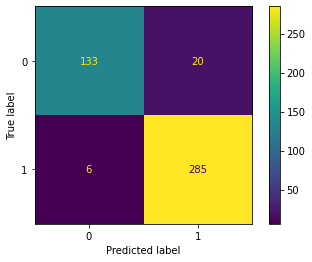

In [88]:
#Linear Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1)
cm_display.plot()
print("Linear Regression: ")
plt.show()

In [89]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.9414414414414415


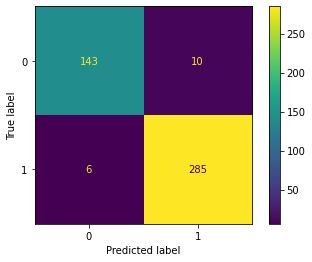

In [90]:
#Logics Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2)
cm_display.plot()
plt.show()

In [91]:
#Print Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.963963963963964


ROC Curve -Linear Regression
0.9243312445253016


Text(0, 0.5, 'TP Rate')

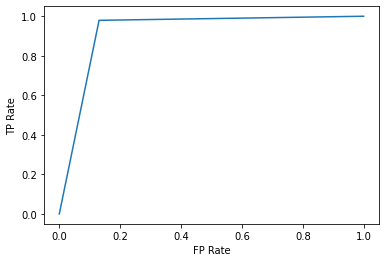

In [92]:
#ROC Curve -Linear
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curve -Linear Regression")
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")


ROC Curve -Logistic Regression
0.9570109830873931


Text(0, 0.5, 'TP Rate')

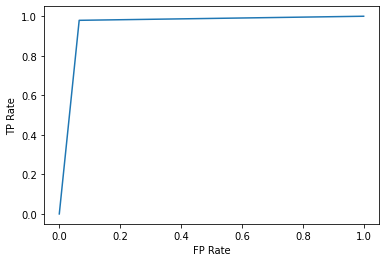

In [93]:
#ROC Curve Logistic 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curve -Logistic Regression")
print(roc_auc)
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel("FP Rate")
plt.ylabel("TP Rate")

 **Summary**

After applying the different classification models, we have got below accuracies with different models:
1. Linear Regression ~ 92.4%
2. Logistic Regression ~ 95.7%

